####  Задача о подбрасывании монеты, или модель бета-биномиального распределения

О диаграммах Kruschke:http://www.sumsar.net/blog/2013/10/diy-kruschke-style-diagrams/

Работаем с примером модели байесовского вывода -  задаче о подбрасывании монеты.
Будем считать, что: 

 * Монета с отклонением 1 всегда падает орлом вверх, 
 * Монета с отклонением 0 всегда падает вверх решкой.
 * При отклонении 0.5 в половине случаев выпадает орел, в половине случаев – решка. 


Для представления отклонения будет использоваться параметр $\theta$, а при общем количестве 
подбрасываний монеты $N$ число выпавших орлов обозначается переменной $Y$.

__Выбор правдоподобия (likelihood) $p(Y|\theta)$:__


Предположения:
 1. возможны только два итоговых результата – выпадение орла или решки
 2. любое подбрасывание монеты никак не влияет на другие броски - 
    подбрасывания монеты абсолютно независимы друг от друга
 3. подбрасывания монеты подчиняются одному и тому же распределению
 
Подходящий выбор  правдоподобия - биномиальное распределение, с учетом числа сочетаний из $N$ событий по $y$ исходов, при которых монета падает орлом вверх:

$$p(y|\theta, N)=\frac{N!}{y!(N-y)!}\theta^y(1-\theta)^{N-y}$$



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
seaborn   : 0.11.1
numpy     : 1.19.2
scipy     : 1.5.2
matplotlib: 3.3.4



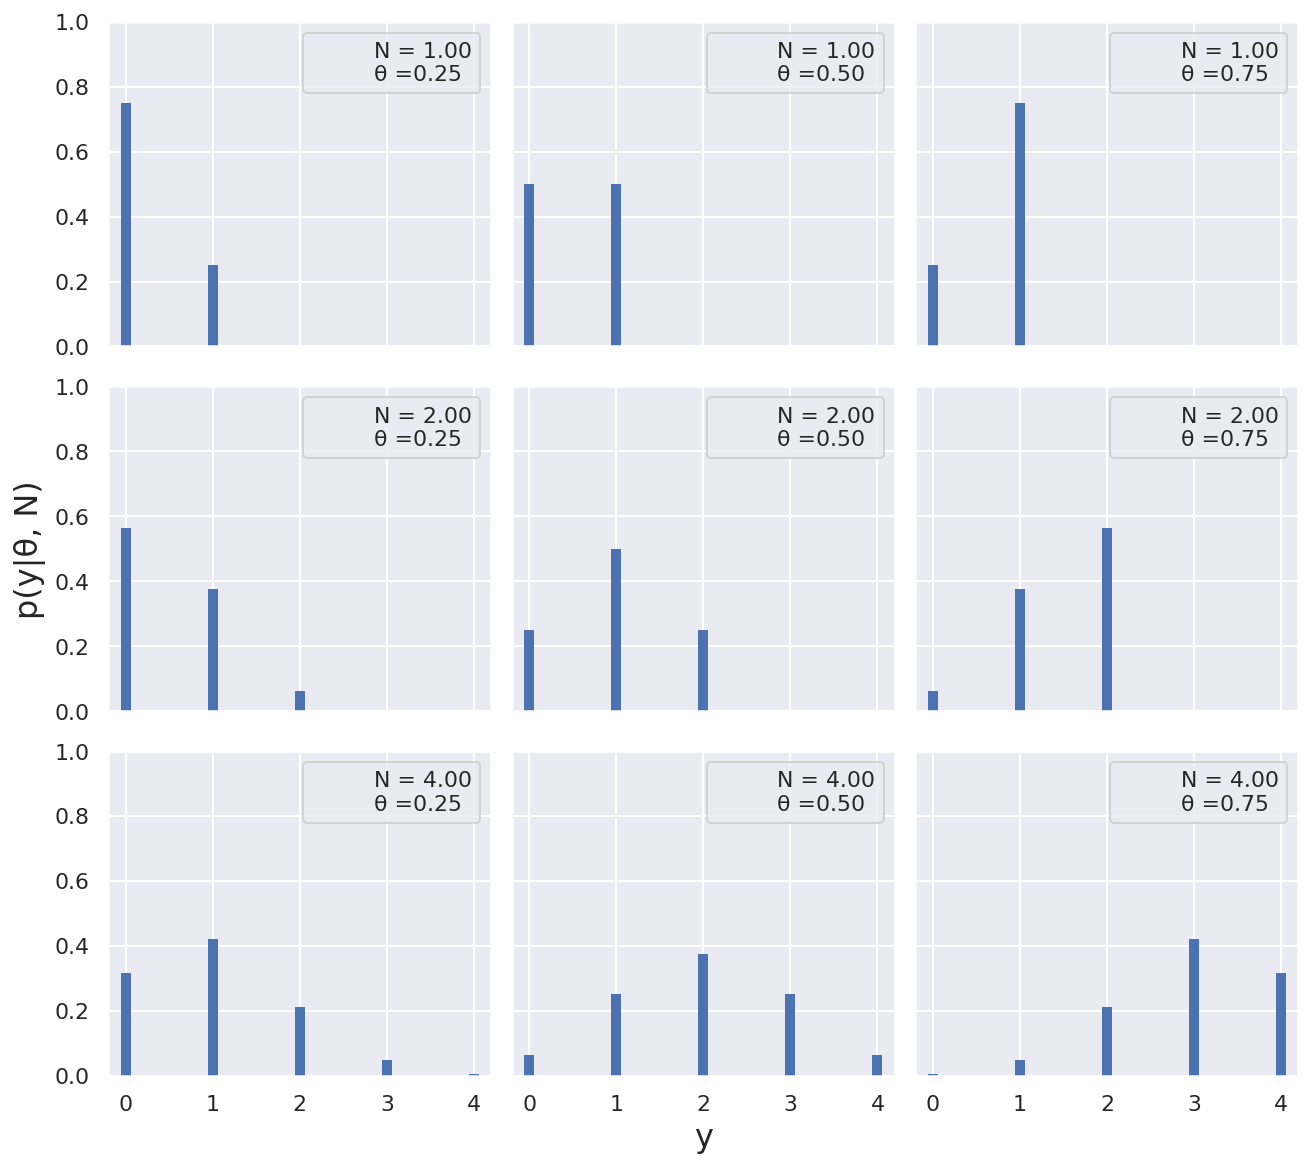

In [19]:
n_params = [1, 2, 4]         # Количество испытаний
p_params = [0.25, 0.5, 0.75] # Вероятность успешного результата

x = np.arange(0, max(n_params)+1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, 
                     sharey=True, figsize=(9, 8), constrained_layout=True)


for i in range(len(n_params)):
    for j in range(len(p_params)):
        
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ ={:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()
        ax[2,1].set_xlabel('y', fontsize=16)
        ax[1,0].set_ylabel('p(y|θ, N)', fontsize=16)
        ax[0,0].set_xticks(x)
plt.show()

Можно видеть, что $\theta$ в данном примере показывает, насколько вероятно выпадение орла при подбрасывании монеты, т.е. успешного результата.

__Выбор априорной вероятности (prior) $p(\theta)$:__


Для правдоподобия в виде биномиального распределения удобно использовать сопряженное бета-распределение:

$$p(\theta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$


__Сопряженное априорное распределение__ правдоподобия – \
это априорная вероятность, которая при использовании в сочетании с заданным правдоподобием
возвращает апостериорную вероятность в той же самой функциональной форме, 
в которой была представлена априорная вероятность

Значения бета-распределения ограничены интервалом [0, 1]\
Для него также есть интерпретация параметров: $\alpha$ - число успехов, $\beta$ - число неудач.\
Множитель в виде соотношения гамма-функций - это множитель нормализации, который обеспечивает равенство 1 при суммировании элементов распределения.

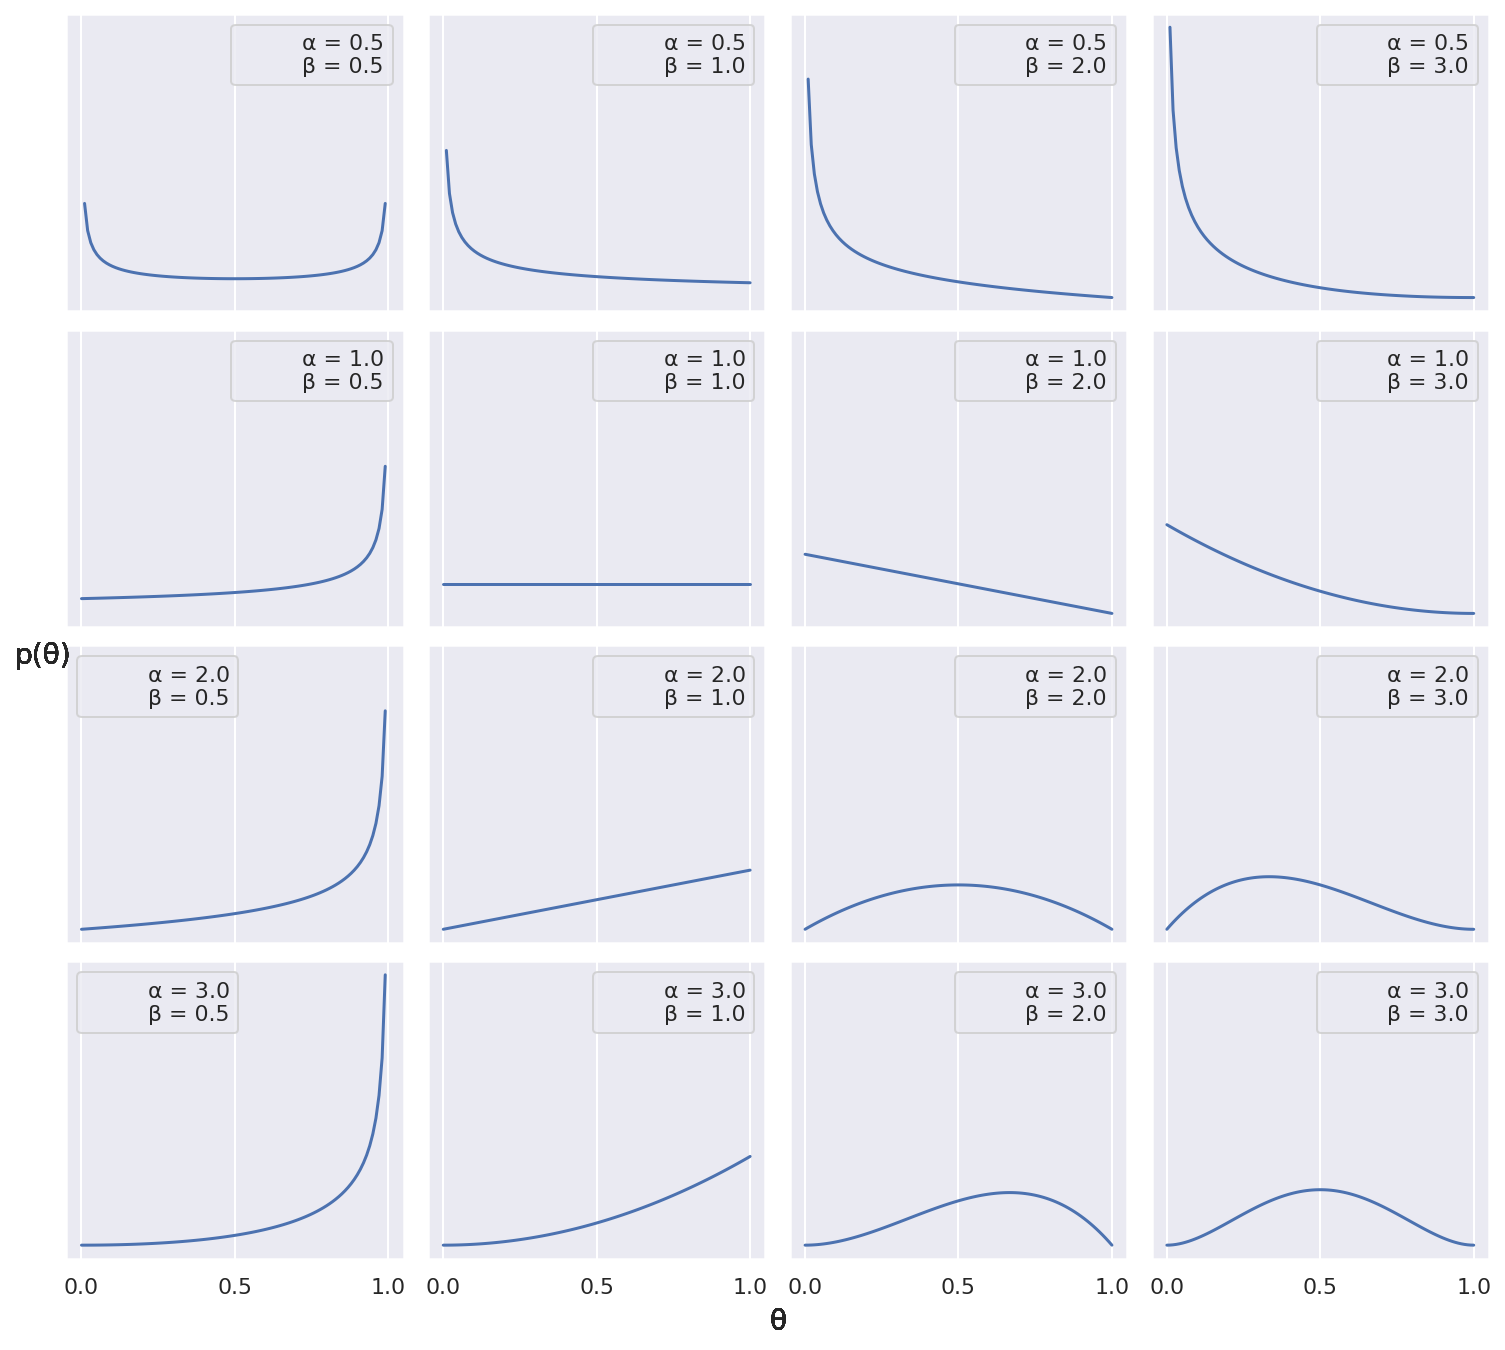

In [31]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)

f, ax = plt.subplots(len(params), len(params), sharex=True, 
                     sharey=True, figsize=(10, 9), constrained_layout=True)

for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,
        b), alpha=0)
        ax[i,j].legend()
        ax[1,0].set_yticks([])
        ax[1,0].set_xticks([0, 0.5, 1])
        f.text(0.5, -0.02, 'θ', ha='center', fontsize=14)
        f.text(-0.03, 0.5, 'p(θ)', va='center', rotation=0, fontsize=14)

__Получение апостериорной вероятности__ $p(\theta|y)$:

$$p(\theta|y) \propto  \frac{N!}{y!(N-y)!}\theta^y(1-\theta)^{N-y}  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

Упростим, отбросив множители, не зависящие от $\theta$, что не нарушает пропорциональности:

$$p(\theta|y) \propto  \theta^y(1-\theta)^{N-y}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

Соответственно:

$$p(\theta|y) \propto  \theta^{y+\alpha-1}(1-\theta)^{N-y+\beta-1}$$


Получили функциональную форму распределения:
$$ p(\theta|y) \propto Beta(\alpha_{prior}+y, \beta_{prior}+(N-y))$$

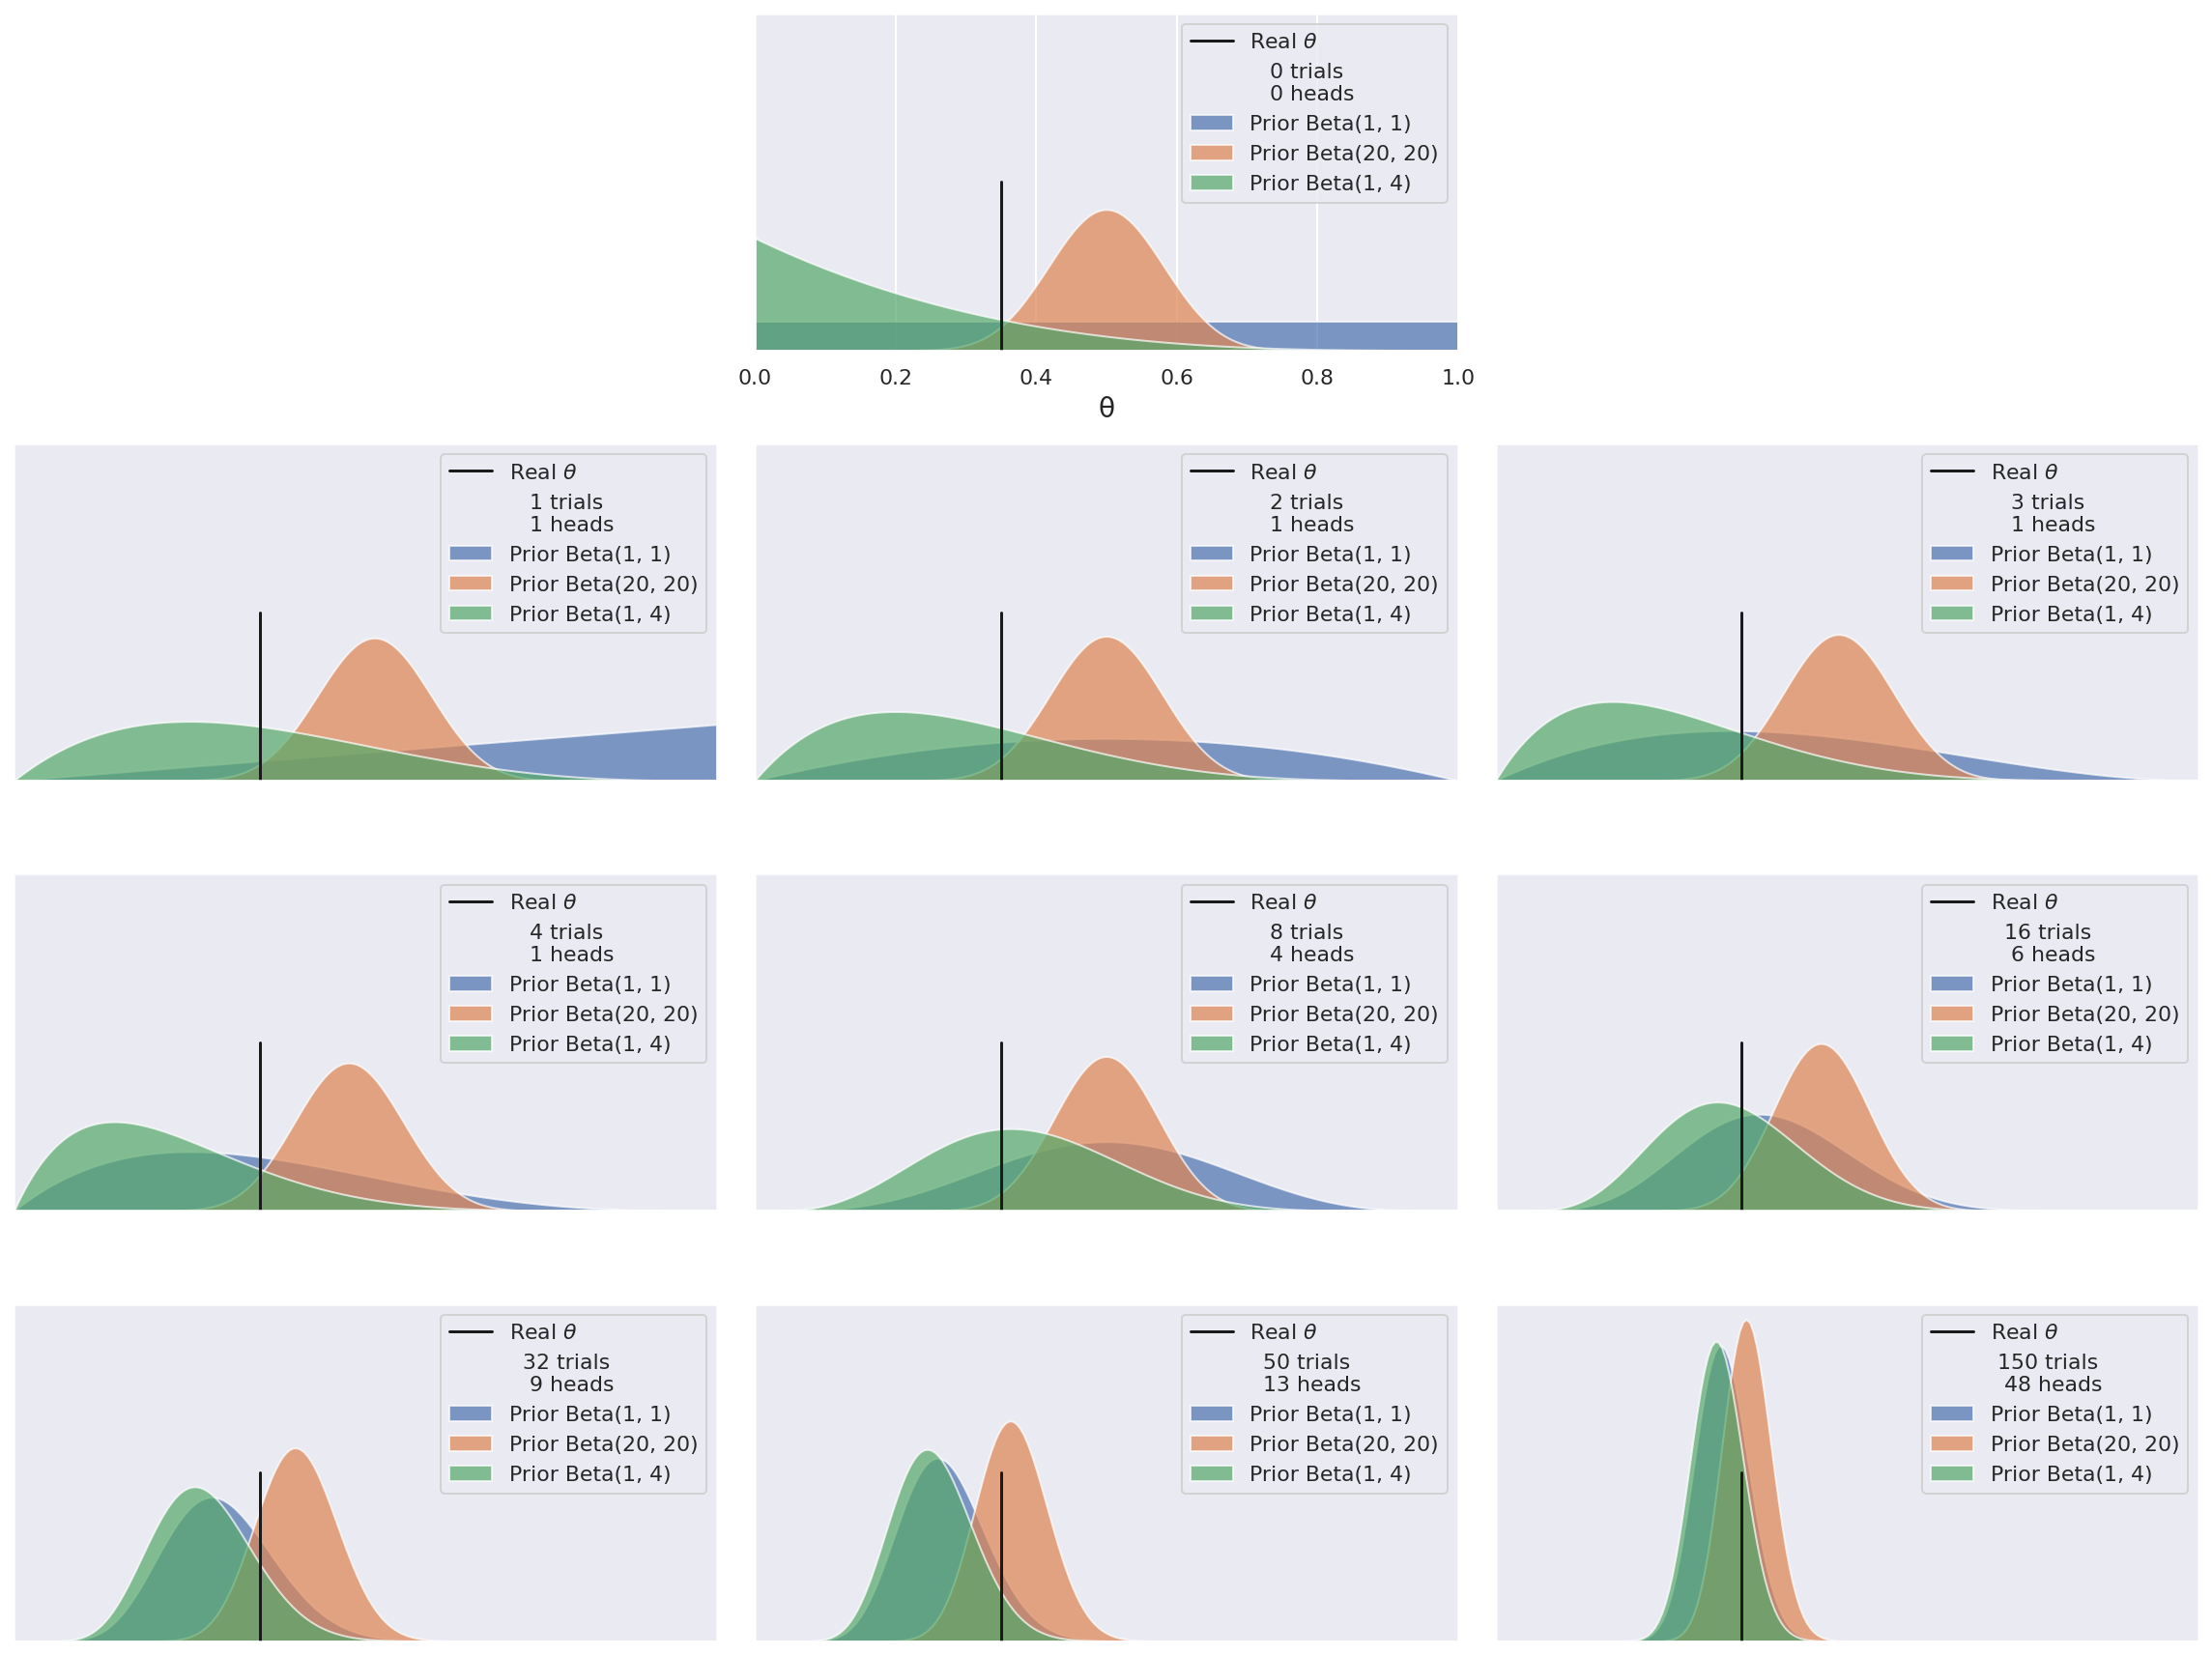

In [46]:
# Пример
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

plt.figure(figsize=(16, 12))
for idx, N in enumerate(n_trials):

    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ', fontsize=14)
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])

    y = data[idx]
    for (a_prior, b_prior) in beta_params:

        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7, label=f'Prior Beta({a_prior}, {b_prior})')

    plt.axvline(theta_real, ymax=0.5, color='k', label=r'Real $\theta$')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

На первом графике три кривые представляют априорные распределения вероятностей.

Синий цвет - априорное распределение до испытаний.

Оранжевый цвет - априорное распределение сконцентрировано в центральной области около значения 0.5, таким образом, это априорное распределение совместимо с информацией, сообщающей, что монета имеет более или менее равные шансы упасть вверх орлом или решкой при подбрасывании.

Зеленый цвет - априорное распределение придает наибольший вес результатам с отклонением в сторону выпадения решки.


Все остальные графики отображают апостериорные распределения для последовательно проводимых испытаний.

---

__Плотность апостериорного распределения__

Широко применяемым приемом для обобщения размаха апостериорного распределения является использование интервала плотности апостериорного распределения (__Highest-Posterior Density – HPD__. 

__Интервал плотности апостериорного распределения (ПАР)__ – это самый короткий интервал, содержащий определенную часть плотности распределения. Чаще всего применяется интервал ПАР 95 %, часто дополняемый 50%-ным интервалом ПАР. Если интервал ПАР 95 % для некоторого анализа [2–5], то для исследуемых данных и используемой модели можно считать, что рассматриваемый параметр имеет
значение в интервале от 2 до 5 с вероятностью 0.95.


__Важно отличать доверительные интервалы (confidence intervals) и интервалы ПАР (HPD)__

Частотный подход к вероятностям определяет их как величины соотношения успешных исходов к общему числу исходов в процессе наблюдений. В пределе эта величина должна сходится к некоторому фиксированному значению. Поэтому $\alpha$-процентный доверительный интервал указывает на то, что в числе из $N$ испытаний $\alpha N$ исходов попадет в интервал, а $(1-\alpha) N$ - нет (например, 0.99, 0.95, 0.90).

Байесовский подход к вероятностям рассматривает их как субъективные ожидания, поэтому описание HPD - это вероятность нахождения исследуемого параметра в полученном интервале наименьшей длины.

В курсах статистики доверительный интервал часто интерпретируют как HPD, что в основе своей неверно, если рассматривать оба подхода к вероятностям параллельно.

ArviZ – это пакет для выполнения анализа данных с использованием байесовских моделей. 
ArviZ содержит множество функций, помогающих обобщить апостериорное распределение, например az.plot_posterior
может использоваться для генерации графика со средним значением и интервалом ПАР:

In [47]:
import arviz as az 

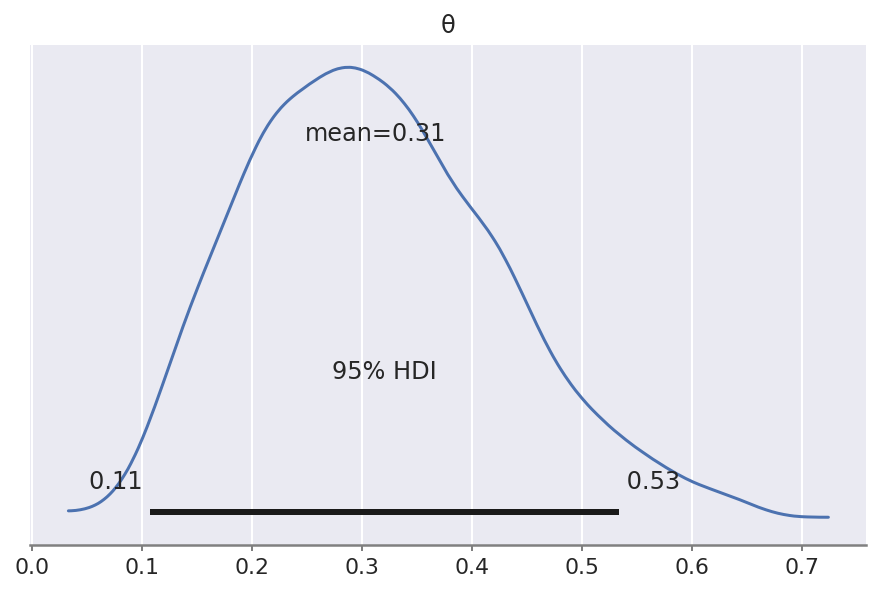

In [51]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)}, hdi_prob=0.95)
plt.show()


---

__Posterior predictive__

Одним из полезных элементов байесовского комплекта инструментальных средств является наличие апостериорного распределения вероятностей, что позволяет использовать апостериорное распределение $p(\theta|y)$ для генерации
прогнозов $\hat{y}$ на основе данных $y$ и предполагаемых оценочных параметров $\theta$:

$$p(\hat{y}|y) = \int{p(\hat{y}|\theta)p(\theta|y)d\theta}$$

Таким образом, апостериорное прогнозируемое распределение является усреднением условных прогнозов по апостериорному распределению параметра $\theta$. Итеративно вычислительный процесс представляет собой:
1. Выбор оценки $\theta$ из апостериорного распределения $p(\theta|y)$.
2. Получение точечной оценки $\hat{y}$ с помощью функции правдоподобия и полученной оценки $\theta$ из $p(\theta|y)$.